In [14]:
import numpy as np
from qutip import *
import matplotlib.pyplot as plt
from mpmath import *
import dynamiqs as dq
import jax.numpy as jnp
from scipy.ndimage import gaussian_filter1d


In [4]:
lam = 0.05
gamma_0 = 0.2

def Expr(t):
    l = np.emath.sqrt(lam**2 - 2*gamma_0*lam)

    expression = ((-l**2 + lam**2)*np.sinh(l*t/2))/(l*np.cosh(l*t/2) + lam*np.sinh(l*t/2))

    return expression

def s(t):
    return np.imag(Expr(t))

#Define Hamiltonian

H0 = sigmam()*sigmap()

# Define gammma(t)

# def gam(t):
#     if np.real(Expr(t)) < 0 :
#         return np.sqrt(complex(np.real(Expr(t))))
#     else:
#         return np.sqrt(np.real(Expr(t)))       #np.sqrt(np.real(Expr(t)))

# def gam(t):
#     return np.abs(np.real(Expr(t)))
def gam(t):
    return np.real(Expr(t))


time = np.linspace(0.1, 200, 100)  # Adjust time range as needed

# Calculate gam values
gam_vals = np.array([gam(t) for t in time])



def smoothen_gamma(gamma_vals, sigma=2):
    """
    Smoothen the gamma(t) values using a Gaussian filter.

    Parameters:
    gamma_vals (np.array): The input array of gamma(t) values.
    sigma (float): The standard deviation for Gaussian kernel. Higher values result in more smoothing.
    
    Returns:
    np.array: The smoothened gamma(t) array.
    """
    # Apply Gaussian filter for smoothing
    smoothened_gamma = gaussian_filter1d(gamma_vals, 3)
    return smoothened_gamma

gam_vals_new = smoothen_gamma(gam_vals)



<>:6: SyntaxWarning: invalid escape sequence '\g'
<>:6: SyntaxWarning: invalid escape sequence '\g'
<>:6: SyntaxWarning: invalid escape sequence '\g'
<>:6: SyntaxWarning: invalid escape sequence '\g'
C:\Users\DELL\AppData\Local\Temp\ipykernel_14932\812826872.py:6: SyntaxWarning: invalid escape sequence '\g'
  plt.title(f"Time Evolution of $\gamma(t)$ \n$\lambda$: {lam}, $\gamma_0$: {gamma_0}", fontsize=18, pad=20)
C:\Users\DELL\AppData\Local\Temp\ipykernel_14932\812826872.py:6: SyntaxWarning: invalid escape sequence '\g'
  plt.title(f"Time Evolution of $\gamma(t)$ \n$\lambda$: {lam}, $\gamma_0$: {gamma_0}", fontsize=18, pad=20)


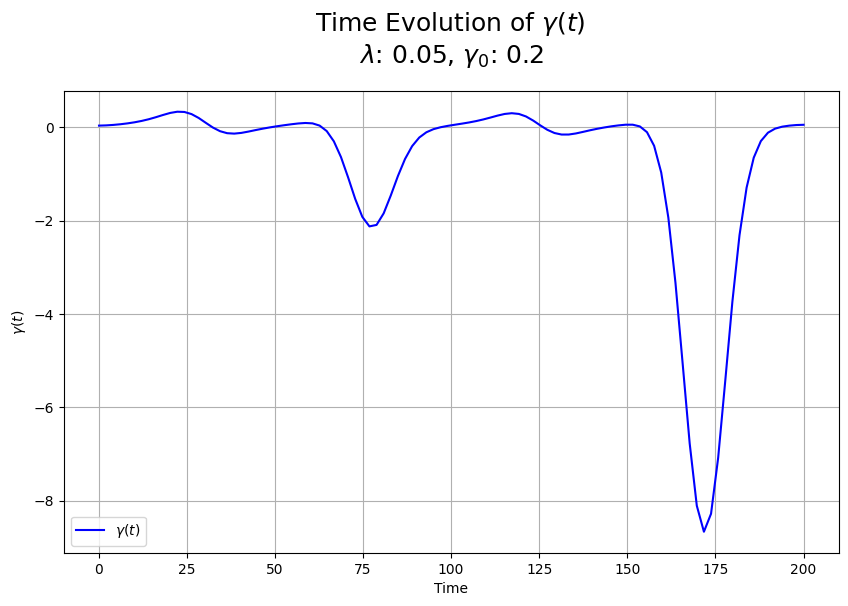

In [5]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(time, gam_vals_new, label=r'$\gamma(t)$', color='b')
plt.xlabel('Time')
plt.ylabel(r'$\gamma(t)$')
plt.title(f"Time Evolution of $\gamma(t)$ \n$\lambda$: {lam}, $\gamma_0$: {gamma_0}", fontsize=18, pad=20)
plt.legend()
plt.grid(True)
plt.show()



In [72]:
tsave = jnp.linspace(0.1, 200, 100) 

psi = (dq.basis(2,0) + dq.basis(2,1))#*1/np.sqrt(2)

psi = dq.unit(psi)

rho = dq.todm(psi)

H = dq.zero(2)
# define list of observables
ops_and_rates = [[sigmap(),gam_vals_new]]  # time-dependent collapse term

jump_ops = [dq.sigmap()]                    # list of jump operators
res = dq.mesolve(H, jump_ops, psi, tsave) 

exp_ops = [dq.sigmaz(),dq.sigmax()]  # expectation value of sigma_z, sigma_x

In [77]:
# The TimeArray type
g = lambda t: jnp.sin(jnp.pi * t)
type(g(10))
# JO = dq.modulated(gam, dq.sigmap())

jaxlib.xla_extension.ArrayImpl

In [71]:
H

Array([[0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j]], dtype=complex64)